# EMアルゴリズム実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Gaussian Mixture Model')

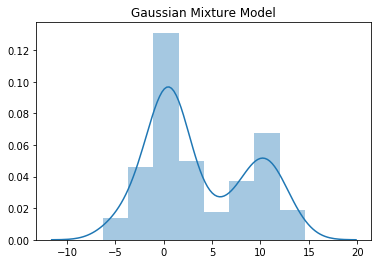

In [3]:
x1 = np.random.normal(loc=0.5, scale=1, size=100).reshape(-1, 1)
x2 = np.random.normal(loc=10, scale=2, size=100).reshape(-1, 1)
x3 = np.random.normal(loc=0, scale=3, size=100).reshape(-1, 1)
x = np.concatenate([x1, x2, x3])
sns.distplot(x)
plt.title("Gaussian Mixture Model")


In [11]:
def Gaus(x,m,s): #正規分布の値を取得
    g = np.exp(-pow((x-m),2)/(2*s))/np.sqrt(2*np.pi*s)
    return g

In [12]:
#事後分布
def calc_gamma(x,pi,mu,sig):
    gam = pi*Gaus(x, mu, sig)
    gam/=np.sum(gam,axis=1).reshape(len(x),1)
    return gam

In [13]:
#パラメータ更新
def update_params(gamma,x,pi,mu,sig):
    N_k = np.sum(gamma, axis=0)
    N = np.sum(N_k)
    mu_k = np.sum(x*gamma, axis=0)/N_k
    sig_k = np.sum(gamma*pow(x-mu,2),axis=0)/N_k
    pi_k = N_k/N
    return pi_k, mu_k, sig_k

In [15]:
def iteration(x,mu,sig,pi,l=100,e=0.01):
    LF=0
    for i in range(l):
        gamma = calc_gamma(x,pi,mu,sig)
        LF_new = np.sum(np.log(np.sum(pi*Gaus(x,mu,sig),axis=1)))
        ch = LF_new - LF
        if np.abs(ch) < e:
            print("Iteration is finished {} iter" .format(i+1))
            break
        LF = LF_new
        pi, mu, sig = update_params(gamma,x,pi,mu,sig)
    return pi,mu,sig

In [17]:
mu = np.array([0,10,3])
sig = np.array([1,5,10])
pi = np.array([0.1, 0.4, 0.5])
pi,mu,sig = iteration(x, mu,sig,pi, l=100)

Iteration is finished 17 iter


In [18]:
print(pi, mu, np.sqrt(sig))

[0.23978953 0.33337979 0.42683068] [ 0.60073827 10.2108394   0.15967658] [0.91355955 1.90748705 2.94233399]


Text(0.5, 1.0, 'Predicted GMM')

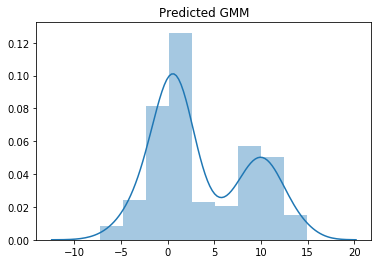

In [19]:
y0 = np.random.normal(loc=mu[0], scale=np.sqrt(sig)[0] , size =int(300*pi[0]) ).reshape(-1,1)
y1 = np.random.normal(loc=mu[1], scale=np.sqrt(sig)[1] , size =int(300*pi[1]) ).reshape(-1,1)
y2 = np.random.normal(loc=mu[2], scale=np.sqrt(sig)[2] , size =int(300*pi[2]) ).reshape(-1,1)
y=np.concatenate([y0, y1, y2])
sns.distplot(y)
plt.title("Predicted GMM")